# Multivariate Analysis
Lola Pwasanga
A CFG PROJECT


Multivariate statistics - to see if patterns between race and COVID-19 
susceptibility be explained by other factors, such as socioeconomic 
background/underlying medical conditions

Can patterns between race and COVID-19 susceptibility be 
explained by other factors such as socioeconomic 
background/underlying medical conditions?
 Steps:
 bivariate/ multivariate heat map to check corrolations
 multivariate for regression and causality

# new questions
Is there a relationship between BAME and Covid deaths?
How strong is that relationship?
Which other factors along with BAME contribute to Covid deaths?
What is the effect of each of these factors on Covid deaths?
Given a certain proportion of bame  , can covid deaths be predicted?

In [ ]:
null hypothesis:
There is no relationship between the bame  group (blacks and minority ethnic) and Covid deaths
β1  equals zero
alternative hypothesis:
There is a relationship between the bame  group (blacks and minority ethnic) and Covid deaths
β1  is not equal to zero

In [2]:
import numpy
numpy.__version__

'1.21.5'

In [ ]:
import sys
!{sys.executable} -m pip install seaborn

In [3]:
import numpy as np

In [4]:
import pandas as pd
import  numpy as np
import  statsmodels.api as sm
import  matplotlib.pyplot as plt

import seaborn as sns
import math



# Correlation analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('..complete_agg_new.csv')

data.head()
#df = pd.read_csv('Boston.csv', index_col=0)
#df.head()


,LocalAuthority,Region,Borough,Code,Child_poverty_sum,deprivationscore,sumdeaths,sumdeaths_perthousand,all_bame,all_black,...,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
0,City of London,Central,City of London,E09000001,0.053,88.8,3,0.345,0.214,0.026,...,8584,7.95,3.62,2.70,3.08,1.50,8706,0.124,0.121,0.078
1,Barking and Dagenham,East,Barking and Dagenham,E09000002,5.770,3617.2,103,11.034,9.147,4.451,...,235900,216.29,178.67,116.51,87.81,34.45,211998,1.468,7.202,7.189
2,Barnet,North,Barnet,E09000003,5.212,3366.0,287,30.159,14.662,3.143,...,425715,432.72,205.71,192.08,163.45,90.85,392140,4.291,10.516,8.467
3,Bexley,East,Bexley,E09000004,4.128,2318.9,125,14.651,5.020,2.320,...,253510,340.40,207.41,137.76,119.53,65.40,247258,3.474,7.885,6.616
4,Brent,West,Brent,E09000005,6.060,4359.3,304,31.099,21.737,6.291,...,405143,363.38,200.75,208.16,131.34,61.78,330795,2.919,9.036,9.363


In [30]:
final = data.iloc[:,[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
print(final)

    Child_poverty_sum  deprivationscore  sumdeaths  all_bame  all_black  \
0               0.053              88.8          3     0.214      0.026   
1               5.770            3617.2        103     9.147      4.451   
2               5.212            3366.0        287    14.662      3.143   
3               4.128            2318.9        125     5.020      2.320   
4               6.060            4359.3        304    21.737      6.291   
5               4.454            2752.2        152     5.988      2.280   
6               4.250            2657.4         91     9.453      2.263   
7               7.252            4830.7        252    19.315      8.647   
8               6.439            4420.7        239    19.193      4.091   
9               5.977            4649.5        220    13.692      5.948   
10              6.453            3665.4        140    11.644      5.825   
11              5.977            4733.1        146    12.723      6.508   
12              3.322    

In [7]:
# checking the percentage of missing values in each variable
final.isnull().sum()/len(final)*100

Child_poverty_sum          0.0
deprivationscore           0.0
sumdeaths                  0.0
all_bame                   0.0
all_black                  0.0
pakistaniOR_Bangladeshi    0.0
allindian                  0.0
total_patients             0.0
Hypertensionsum            0.0
Obesitysum                 0.0
Diabetessum                0.0
Asthmasum                  0.0
heart_diseasesum           0.0
sum_population             0.0
sum_over70                 0.0
sum_at_risk_jobs           0.0
sum_insecure               0.0
dtype: float64

In [8]:
#column info
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Child_poverty_sum        33 non-null     float64
 1   deprivationscore         33 non-null     float64
 2   sumdeaths                33 non-null     int64  
 3   all_bame                 33 non-null     float64
 4   all_black                33 non-null     float64
 5   pakistaniOR_Bangladeshi  33 non-null     float64
 6   allindian                33 non-null     float64
 7   total_patients           33 non-null     int64  
 8   Hypertensionsum          33 non-null     float64
 9   Obesitysum               33 non-null     float64
 10  Diabetessum              33 non-null     float64
 11  Asthmasum                33 non-null     float64
 12  heart_diseasesum         33 non-null     float64
 13  sum_population           33 non-null     int64  
 14  sum_over70               33 

In [9]:
final.duplicated().sum() #any dups?

0

In [10]:
final.sumdeaths.describe() # dependent variable

count     33.00000
mean     150.00000
std       65.81888
min        3.00000
25%      103.00000
50%      146.00000
75%      172.00000
max      304.00000
Name: sumdeaths, dtype: float64

In [11]:
final.describe()

,Child_poverty_sum,deprivationscore,sumdeaths,all_bame,all_black,pakistaniOR_Bangladeshi,allindian,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
count,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,4.981242,3149.881818,150.00000,11.742364,3.901273,1.586182,1.901515,303632.303030,298.725455,170.801515,141.240909,124.649091,53.683333,269941.848485,2.585727,7.640970,6.583424
std,2.074855,1222.720623,65.81888,5.910757,2.726895,2.244981,2.064421,88032.009087,103.313847,62.846932,52.455884,38.230623,20.865859,75625.652663,1.018015,2.515046,2.456943
min,0.053000,88.800000,3.00000,0.214000,0.026000,0.034000,0.029000,8584.000000,7.950000,3.620000,2.700000,3.080000,1.500000,8706.000000,0.124000,0.121000,0.078000
25%,4.118000,2452.200000,103.00000,7.298000,2.244000,0.477000,0.666000,253510.000000,221.060000,118.050000,108.320000,103.020000,38.630000,239142.000000,2.000000,6.204000,5.138000
50%,5.106000,3035.200000,146.00000,12.235000,2.929000,0.885000,0.858000,312086.000000,295.730000,180.690000,149.010000,129.650000,52.160000,276700.000000,2.417000,7.908000,6.839000
75%,6.430000,4322.500000,172.00000,15.069000,5.948000,1.751000,2.941000,360863.000000,369.080000,212.390000,177.260000,144.440000,66.000000,325917.000000,3.261000,9.368000,8.410000
max,9.588000,4882.300000,304.00000,26.204000,9.741000,10.559000,7.663000,428913.000000,490.560000,267.630000,220.490000,191.840000,100.460000,392140.000000,5.141000,12.152000,11.920000


<AxesSubplot:xlabel='all_bame', ylabel='Count'>

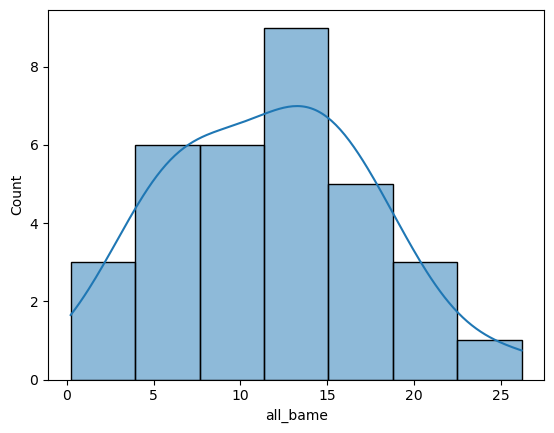

In [13]:
sns.histplot(final.all_bame,kde=True)

In [ ]:
Histogram: shows proportion of all ethnic groups in London boroughs, with a max of 26

In [14]:
final.nunique(axis=0)

Child_poverty_sum          32
deprivationscore           33
sumdeaths                  31
all_bame                   33
all_black                  33
pakistaniOR_Bangladeshi    32
allindian                  33
total_patients             33
Hypertensionsum            33
Obesitysum                 33
Diabetessum                33
Asthmasum                  32
heart_diseasesum           33
sum_population             33
sum_over70                 33
sum_at_risk_jobs           33
sum_insecure               33
dtype: int64

In [19]:


#shape of data

final.shape

(33, 17)

if variances are large when calculating standard deviation then  standardisation will be required. Thus, in order to compare the variables, we need to standardise each variable so that it has a sample variance of 1 and sample mean of 0. 

In [15]:
final.apply(np.std)

Child_poverty_sum              2.043176
deprivationscore            1204.052036
sumdeaths                     64.813953
all_bame                       5.820511
all_black                      2.685261
pakistaniOR_Bangladeshi        2.210705
allindian                      2.032901
total_patients             86687.930020
Hypertensionsum              101.736443
Obesitysum                    61.887381
Diabetessum                   51.654984
Asthmasum                     37.646915
heart_diseasesum              20.547277
sum_population             74470.994740
sum_over70                     1.002472
sum_at_risk_jobs               2.476646
sum_insecure                   2.419431
dtype: float64

## standardisation:
 standardise in order to compare the variables because the variables have very different standard deviations - standardise each variable so that it has a sample variance of 1 and sample mean of 0. 

In [17]:

#  calculate the variance of all the numerical variables.


 
final.var()

Child_poverty_sum          4.305024e+00
deprivationscore           1.495046e+06
sumdeaths                  4.332125e+03
all_bame                   3.493705e+01
all_black                  7.435958e+00
pakistaniOR_Bangladeshi    5.039941e+00
allindian                  4.261832e+00
total_patients             7.749635e+09
Hypertensionsum            1.067375e+04
Obesitysum                 3.949737e+03
Diabetessum                2.751620e+03
Asthmasum                  1.461581e+03
heart_diseasesum           4.353841e+02
sum_population             5.719239e+09
sum_over70                 1.036354e+00
sum_at_risk_jobs           6.325454e+00
sum_insecure               6.036570e+00
dtype: float64

In [45]:
#perform the correlation calculation 
df=final.drop('sumdeaths', 1)
df.corr()


C:\Users\TEMP\AppData\Local\Temp\ipykernel_23536\996287989.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=final.drop('sumdeaths', 1)


,Child_poverty_sum,deprivationscore,all_bame,all_black,pakistaniOR_Bangladeshi,allindian,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
Child_poverty_sum,1.000000,0.879166,0.839256,0.737099,0.606211,0.322835,0.786860,0.571113,0.826970,0.780448,0.686127,0.404346,0.781948,0.151451,0.828041,0.872630
deprivationscore,0.879166,1.000000,0.781860,0.855122,0.327425,0.201698,0.797393,0.536101,0.795093,0.679740,0.635645,0.329762,0.784877,0.138622,0.754959,0.813589
all_bame,0.839256,0.781860,1.000000,0.673100,0.567500,0.659134,0.799623,0.511375,0.666742,0.808639,0.592870,0.387557,0.743321,0.136860,0.715544,0.793600
all_black,0.737099,0.855122,0.673100,1.000000,0.082645,0.064441,0.621560,0.433284,0.669098,0.516673,0.529240,0.150854,0.592220,0.027878,0.660657,0.706488
pakistaniOR_Bangladeshi,0.606211,0.327425,0.567500,0.082645,1.000000,0.280117,0.327242,0.005381,0.221855,0.343616,0.138365,0.035084,0.325921,-0.203701,0.259466,0.319374
allindian,0.322835,0.201698,0.659134,0.064441,0.280117,1.000000,0.470680,0.438247,0.349417,0.683709,0.367138,0.497715,0.397302,0.324513,0.393478,0.464501
total_patients,0.786860,0.797393,0.799623,0.621560,0.327242,0.470680,1.000000,0.774144,0.798204,0.850948,0.855774,0.660758,0.979376,0.510302,0.877902,0.846575
Hypertensionsum,0.571113,0.536101,0.511375,0.433284,0.005381,0.438247,0.774144,1.000000,0.855605,0.879795,0.937765,0.944526,0.812753,0.871221,0.908049,0.811715
Obesitysum,0.826970,0.795093,0.666742,0.669098,0.221855,0.349417,0.798204,0.855605,1.000000,0.883641,0.849702,0.721981,0.822192,0.546906,0.945709,0.942525
Diabetessum,0.780448,0.679740,0.808639,0.516673,0.343616,0.683709,0.850948,0.879795,0.883641,1.000000,0.863687,0.818044,0.846175,0.621056,0.915329,0.908580


In [78]:
final.corr()

,Child_poverty_sum,deprivationscore,sumdeaths,all_bame,all_black,pakistaniOR_Bangladeshi,allindian,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
Child_poverty_sum,1.000000,0.879166,0.631430,0.839256,0.737099,0.606211,0.322835,0.786860,0.571113,0.826970,0.780448,0.686127,0.404346,0.781948,0.151451,0.828041,0.872630
deprivationscore,0.879166,1.000000,0.647293,0.781860,0.855122,0.327425,0.201698,0.797393,0.536101,0.795093,0.679740,0.635645,0.329762,0.784877,0.138622,0.754959,0.813589
sumdeaths,0.631430,0.647293,1.000000,0.775347,0.524773,0.177015,0.665155,0.826211,0.805802,0.742621,0.903598,0.759601,0.748962,0.808118,0.614894,0.804729,0.801861
all_bame,0.839256,0.781860,0.775347,1.000000,0.673100,0.567500,0.659134,0.799623,0.511375,0.666742,0.808639,0.592870,0.387557,0.743321,0.136860,0.715544,0.793600
all_black,0.737099,0.855122,0.524773,0.673100,1.000000,0.082645,0.064441,0.621560,0.433284,0.669098,0.516673,0.529240,0.150854,0.592220,0.027878,0.660657,0.706488
pakistaniOR_Bangladeshi,0.606211,0.327425,0.177015,0.567500,0.082645,1.000000,0.280117,0.327242,0.005381,0.221855,0.343616,0.138365,0.035084,0.325921,-0.203701,0.259466,0.319374
allindian,0.322835,0.201698,0.665155,0.659134,0.064441,0.280117,1.000000,0.470680,0.438247,0.349417,0.683709,0.367138,0.497715,0.397302,0.324513,0.393478,0.464501
total_patients,0.786860,0.797393,0.826211,0.799623,0.621560,0.327242,0.470680,1.000000,0.774144,0.798204,0.850948,0.855774,0.660758,0.979376,0.510302,0.877902,0.846575
Hypertensionsum,0.571113,0.536101,0.805802,0.511375,0.433284,0.005381,0.438247,0.774144,1.000000,0.855605,0.879795,0.937765,0.944526,0.812753,0.871221,0.908049,0.811715
Obesitysum,0.826970,0.795093,0.742621,0.666742,0.669098,0.221855,0.349417,0.798204,0.855605,1.000000,0.883641,0.849702,0.721981,0.822192,0.546906,0.945709,0.942525


In [124]:
my_r = final.corr(method="spearman")
print(my_r)

                         Child_poverty_sum  deprivationscore  sumdeaths  \
Child_poverty_sum                 1.000000          0.895295   0.714083   
deprivationscore                  0.895295          1.000000   0.637807   
sumdeaths                         0.714083          0.637807   1.000000   
all_bame                          0.838472          0.766711   0.787899   
all_black                         0.820590          0.867981   0.636637   
pakistaniOR_Bangladeshi           0.556243          0.500543   0.407355   
allindian                         0.394251          0.321524   0.630286   
total_patients                    0.768279          0.777741   0.823667   
Hypertensionsum                   0.565221          0.456217   0.835367   
Obesitysum                        0.776970          0.737968   0.779876   
Diabetessum                       0.726164          0.619318   0.928965   
Asthmasum                         0.657697          0.572407   0.841621   
heart_diseasesum         

#The function mosthighlycorrelated() will print out the linear correlation coefficients for each pair of variables in the data set, in order of the correlation coefficient. 



###  find the top N strongest correlations. For this you can use the function mosthighlycorrelated() below.

In [62]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [125]:
#mosthighlycorrelated(df, 10)
mosthighlycorrelated(final, 10)

,FirstVariable,SecondVariable,Correlation
0,total_patients,sum_population,0.979376
1,sum_at_risk_jobs,sum_insecure,0.955274
2,Obesitysum,sum_at_risk_jobs,0.945709
3,Hypertensionsum,heart_diseasesum,0.944526
4,Obesitysum,sum_insecure,0.942525
5,Hypertensionsum,Asthmasum,0.937765
6,heart_diseasesum,sum_over70,0.932759
7,Asthmasum,sum_at_risk_jobs,0.926222
8,Diabetessum,sum_at_risk_jobs,0.915329
9,Diabetessum,sum_insecure,0.908580


## scatter plot for bame and sumdeaths

C:\Users\TEMP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='all_bame', ylabel='sumdeaths'>

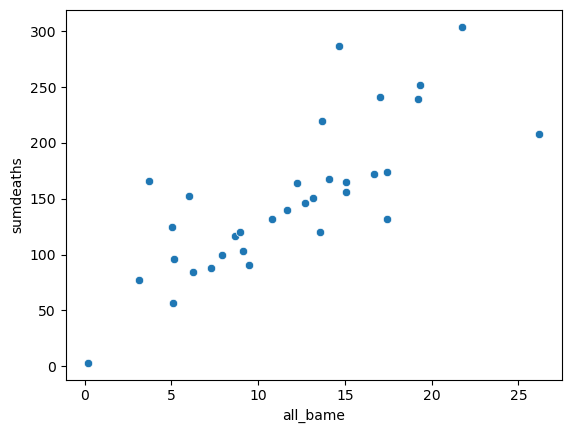

In [81]:
sns.scatterplot(df.all_bame, final.sumdeaths)
#plt.ylim(0,20000)

### positive correlation as allbame goes up so does deaths

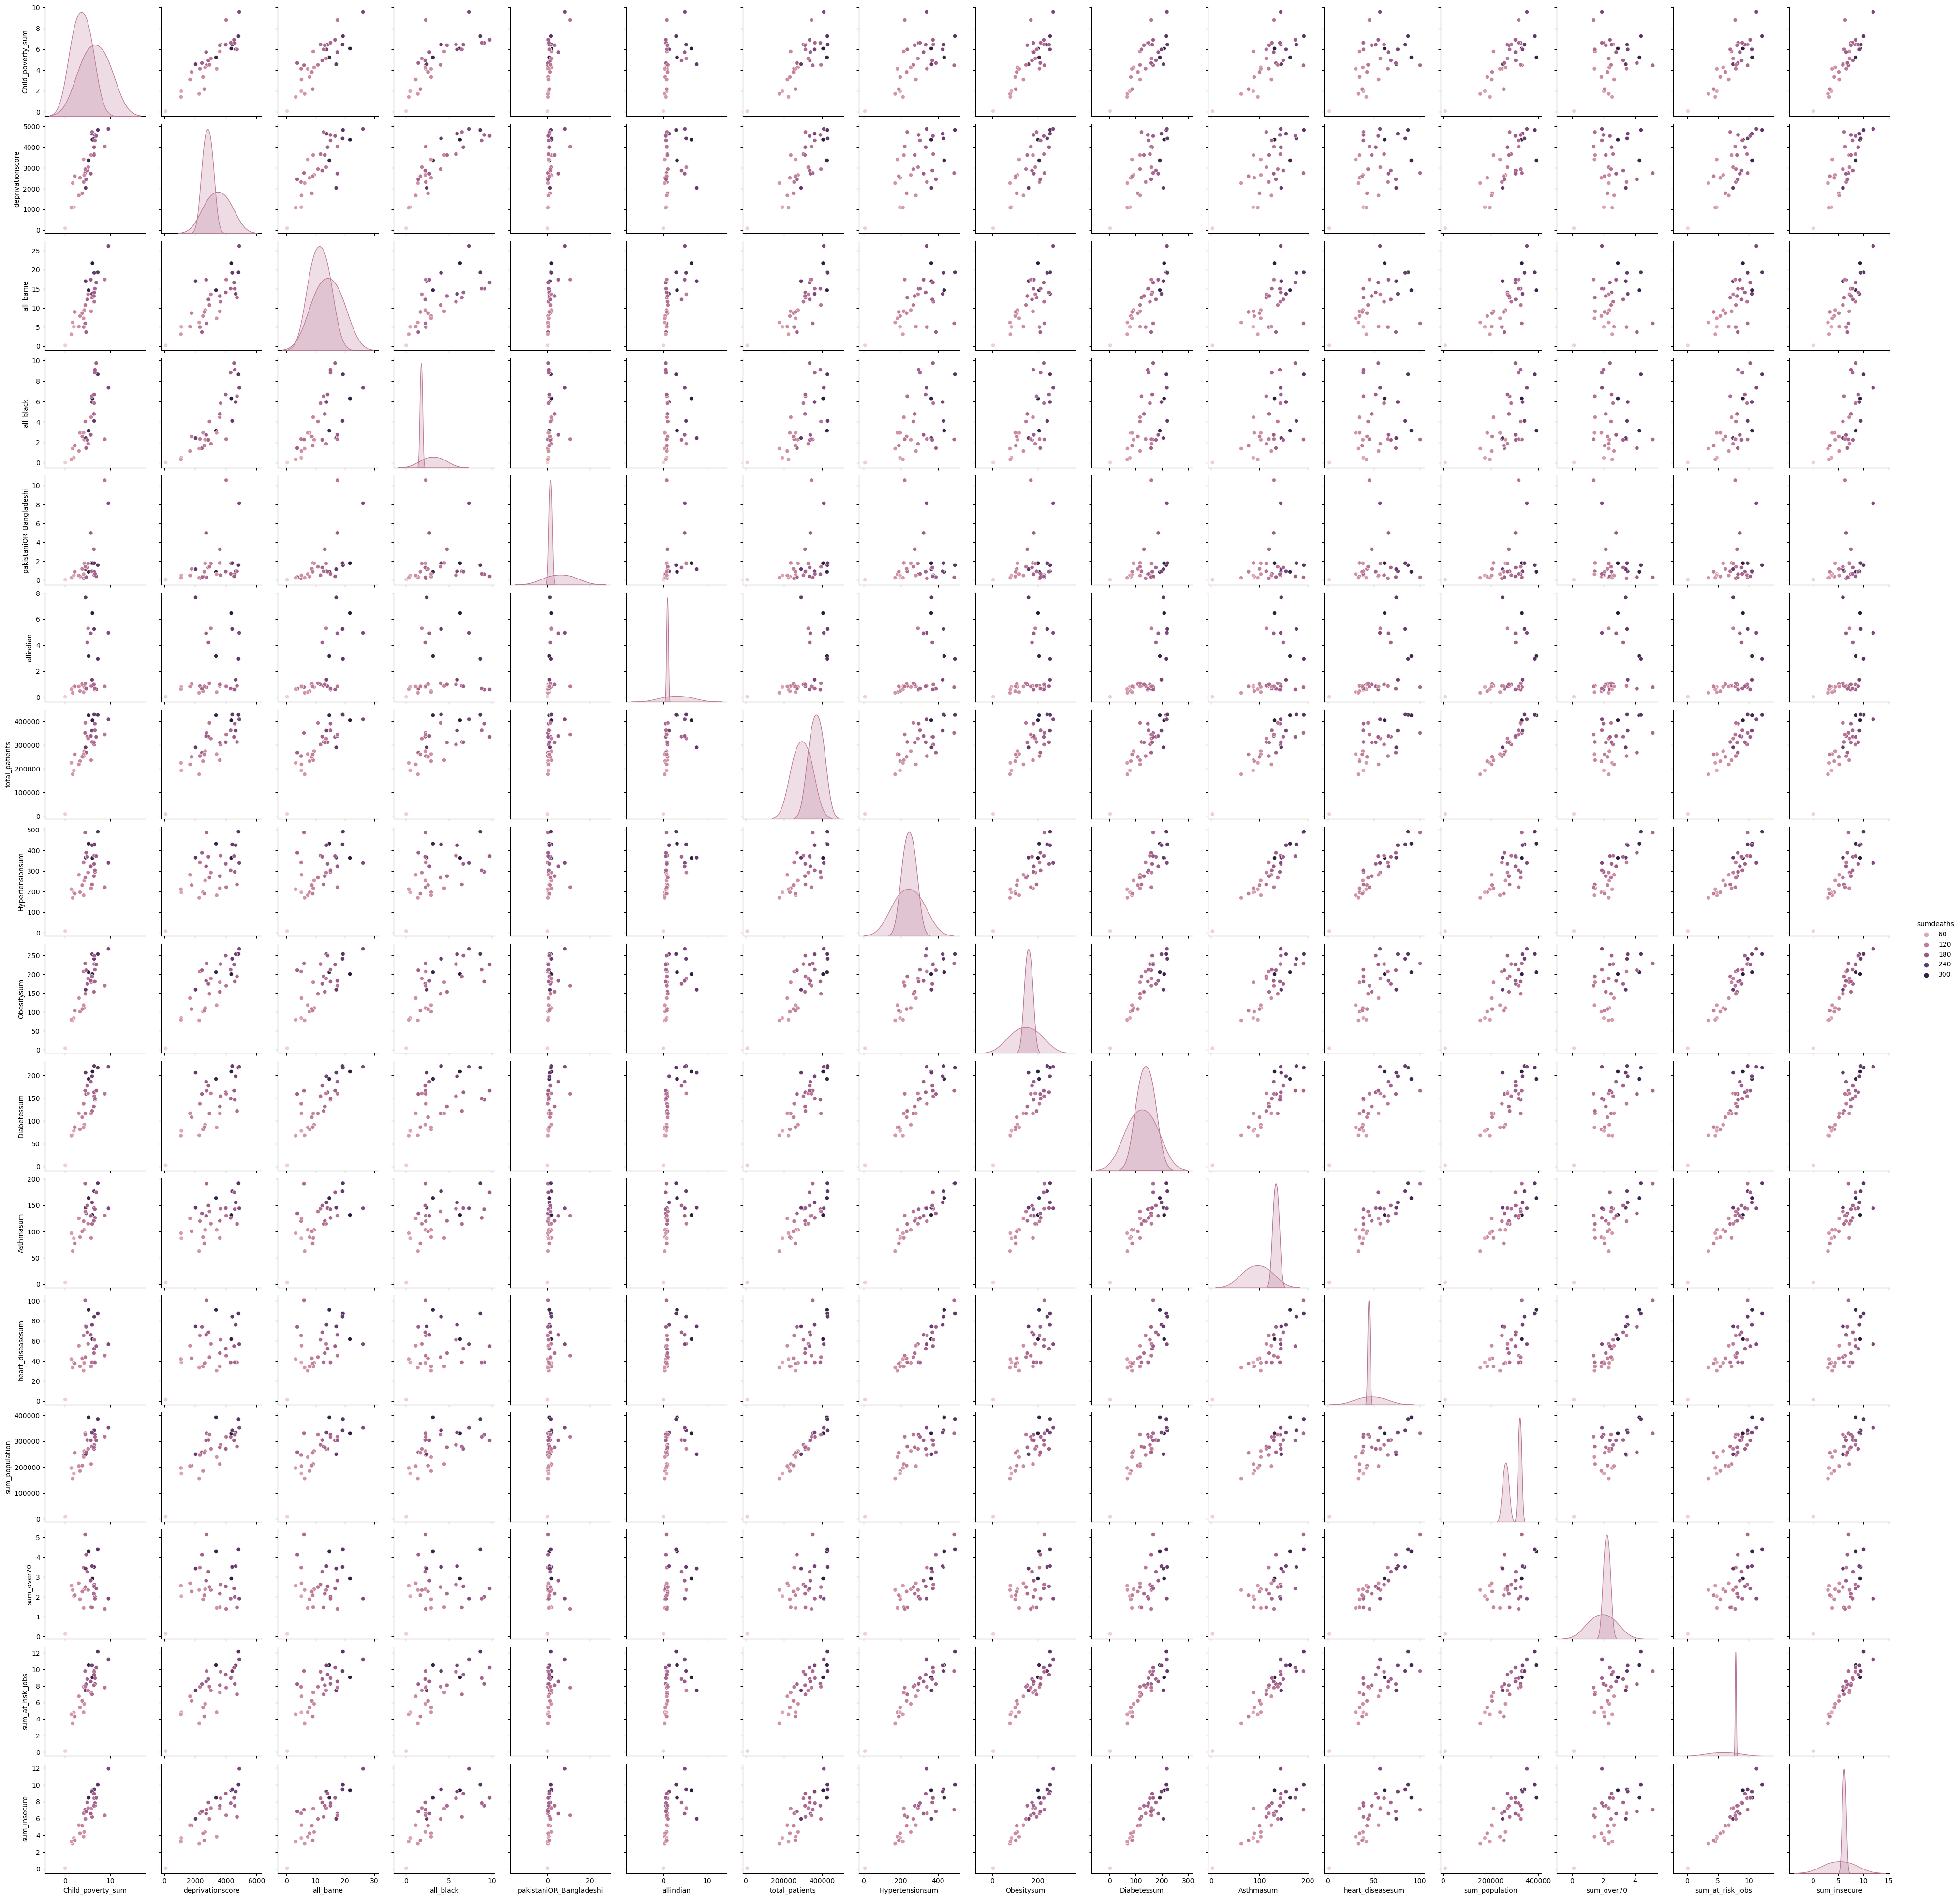

In [86]:
#sns.pairplot(data=final[['all_bame','allindian','pakistaniOR_Bangladeshi','all_black']], hue='sumdeaths')



sns.pairplot(final, hue='sumdeaths')
plt.show()

In [ ]:
#sns.pairplot(data[['all_bame','allindian','pakistaniOR_Bangladeshi','all_black']], hue='sumdeaths')
g = sns.pairplot(data, vars=['all_bame','allindian','pakistaniOR_Bangladeshi','all_black'],hue='sumdeaths')

# Random Forest
Random Forest algorithms is used for feature selection and feature importance,helping to select a smaller subset of features.

In [53]:
from sklearn.ensemble import RandomForestRegressor
#df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,final.sumdeaths)

RandomForestRegressor(max_depth=10, random_state=1)

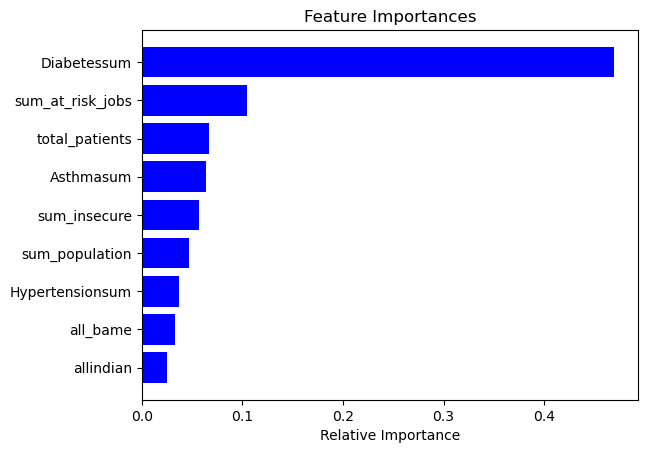

In [54]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# regression analysis multivariate

In [56]:
#Regression
#X = final.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] #Independent variables
X = final.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] #Independent variables
Y = final.iloc[:,2] #Dependent variables
#print(X)
#print(Y)

## regression 1 all variables

In [39]:


X = sm.add_constant(X)


model = sm.OLS(Y,X).fit() #Passing the independent and dependent values
predictions = model.predict(X)

print(model.summary()) #Print out the regression statistics

                            OLS Regression Results                            
Dep. Variable:              sumdeaths   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     19.23
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.68e-07
Time:                        15:50:01   Log-Likelihood:                -134.87
No. Observations:                  33   AIC:                             303.7
Df Residuals:                      16   BIC:                             329.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## error The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems

## Creating standardized input matrices


## standardized regression coefficients provide an easy way to estimate effect size that is independent of units.

extracting standardized coefficients 

Transform the Y and each column of the X matrices into standardize values (z-scores) with mean = 0 and standard deviation = 1.0.

Run the regression with the standardized inputs. This provides standardized regression coefficients

Extract and display the standardized coefficient

In [49]:
from scipy import stats
Y = final['sumdeaths']

Y_norm = pd.Series(stats.zscore(Y), name=Y.name)
Y_norm.head(3)

0   -2.268030
1   -0.725153
2    2.113742
Name: sumdeaths, dtype: float64

In [50]:
df.head(3)

,Child_poverty_sum,deprivationscore,all_bame,all_black,pakistaniOR_Bangladeshi,allindian,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
0,0.053,88.8,0.214,0.026,0.034,0.029,8584,7.95,3.62,2.70,3.08,1.50,8706,0.124,0.121,0.078
1,5.770,3617.2,9.147,4.451,1.805,0.862,235900,216.29,178.67,116.51,87.81,34.45,211998,1.468,7.202,7.189
2,5.212,3366.0,14.662,3.143,0.869,3.154,425715,432.72,205.71,192.08,163.45,90.85,392140,4.291,10.516,8.467


In [51]:
X1_norm =df 
X1_norm.head(3)

,Child_poverty_sum,deprivationscore,all_bame,all_black,pakistaniOR_Bangladeshi,allindian,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
0,0.053,88.8,0.214,0.026,0.034,0.029,8584,7.95,3.62,2.70,3.08,1.50,8706,0.124,0.121,0.078
1,5.770,3617.2,9.147,4.451,1.805,0.862,235900,216.29,178.67,116.51,87.81,34.45,211998,1.468,7.202,7.189
2,5.212,3366.0,14.662,3.143,0.869,3.154,425715,432.72,205.71,192.08,163.45,90.85,392140,4.291,10.516,8.467


In [53]:
X1_norm =df 
X1_norm = pd.DataFrame(stats.zscore(X1_norm))
X1_norm = sm.add_constant(X1_norm)
#X1_norm.columns = df.columns
check = pd.concat([round(X1_norm.mean(axis=0), 5), round(X1_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
Child_poverty_sum,0.0,1.0
deprivationscore,-0.0,1.0
all_bame,-0.0,1.0
all_black,0.0,1.0
pakistaniOR_Bangladeshi,-0.0,1.0
allindian,-0.0,1.0
total_patients,-0.0,1.0
Hypertensionsum,-0.0,1.0
Obesitysum,0.0,1.0


In [64]:
all_norm =final
all_norm = pd.DataFrame(stats.zscore(all_norm))
all_norm = sm.add_constant(all_norm)
#X1_norm.columns = df.columns
check = pd.concat([round(all_norm.mean(axis=0), 5), round(all_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
Child_poverty_sum,0.0,1.0
deprivationscore,-0.0,1.0
sumdeaths,-0.0,1.0
all_bame,-0.0,1.0
all_black,0.0,1.0
pakistaniOR_Bangladeshi,-0.0,1.0
allindian,-0.0,1.0
total_patients,-0.0,1.0
Hypertensionsum,-0.0,1.0


### Running the standardized regression 2
Statsmodels


In [54]:
#standardised data on OLS model
modstd = sm.OLS(Y_norm, X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     19.23
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.68e-07
Time:                        04:17:28   Log-Likelihood:                 2.7911
No. Observations:                  33   AIC:                             28.42
Df Residuals:                      16   BIC:                             53.86
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.776e-17      0.056  -4.99e-16      1.000      -0.118       0.118
Child_poverty_sum           0.2916      0.397      0.734      0.474      -0.551       1.134
deprivationscore           -0.1213      0.295     -0.412      0.686      -0.746       0.504
all_bame                    0.4289      0.410      1.046      0.311      -0.441       1.298
all_black                   0.2946      0.306      0.962      0.350      -0.355       0.944
pakistaniOR_Bangladeshi    -0.4725      0.246     -1.922      0.073      -0.994       0.049
allindian                  -0.3146      0.246     -1.279      0.219      -0.836       0.207
total_patients             -0.1401      0.479     -0.292      0.774      -1.156       0.876
Hypertensionsum            -1.2823      0.777     -1.650      0.118      -2.929       0.365
Obesitysum                 -0.5607      0.288     -1.944      0.070      -1.172       0.051
Diabetessum                 1.3299      0.453      2.937      0.010       0.370       2.290
Asthmasum                  -0.3884      0.309     -1.257      0.227      -1.043       0.266
heart_diseasesum            0.8770      0.490      1.791      0.092      -0.161       1.915
sum_population              0.4890      0.496      0.986      0.339      -0.562       1.540
sum_over70                  0.4764      0.397      1.200      0.248      -0.365       1.318
sum_at_risk_jobs           -0.4548      0.648     -0.702      0.493      -1.829       0.920
sum_insecure                0.4121      0.432      0.955      0.354      -0.503       1.327
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.007
Skew:                           0.035   Prob(JB):                        0.996
Kurtosis:                       3.022   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### the regression results USING coefficients from standardised data

diabetes, obesity and allbame are some of the most important drivers of covid deaths.The coefficient term tells the change in Y for a unit change in X  i.e if allbame rises by 1 unit then covid rises by 0.42.

###   feature selection below

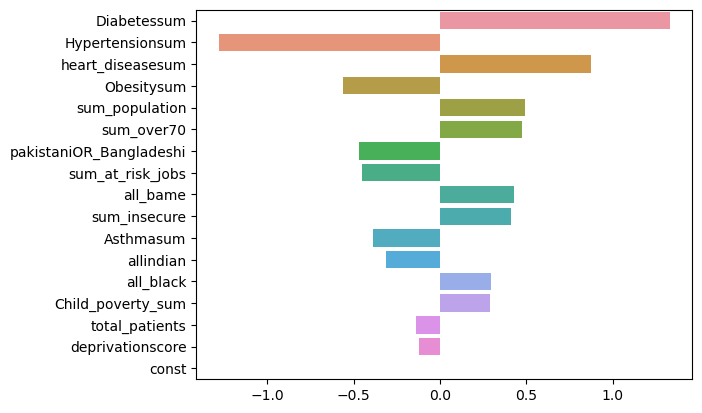

In [67]:
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

## plotting the least square line for features selected

C:\Users\lolap\new\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


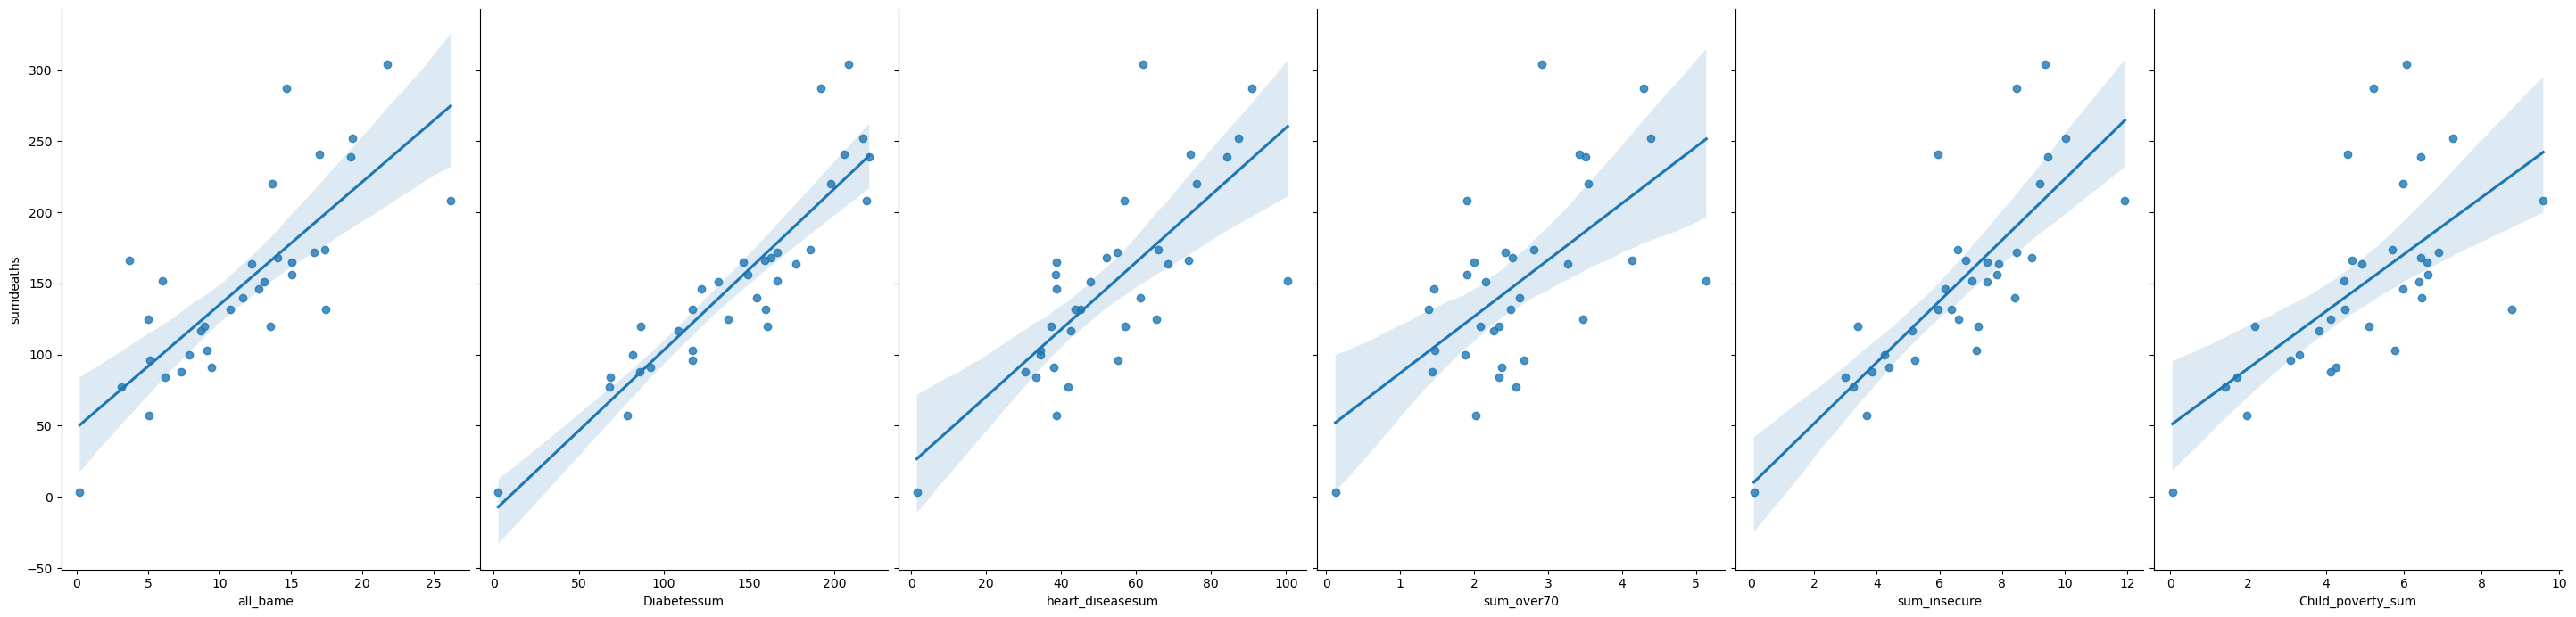

In [94]:
sns.pairplot(data, x_vars=['all_bame','Diabetessum','heart_diseasesum','sum_over70','sum_insecure','Child_poverty_sum'], y_vars='sumdeaths', size=7, aspect=0.7, kind='reg')

# regression 3 with reduced standardised features


In [74]:

all_norm =final[['Diabetessum','heart_diseasesum','sum_over70','all_bame','sum_insecure','Child_poverty_sum']]
all_norm = pd.DataFrame(stats.zscore(all_norm))
all_norm = sm.add_constant(all_norm)
#X1_norm.columns = df.columns
check = pd.concat([round(all_norm.mean(axis=0), 5), round(all_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
Diabetessum,-0.0,1.0
heart_diseasesum,0.0,1.0
sum_over70,-0.0,1.0
all_bame,-0.0,1.0
sum_insecure,-0.0,1.0
Child_poverty_sum,0.0,1.0


In [75]:
#standardised data on OLS model
modstd = sm.OLS(Y_norm, all_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     33.97
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           4.18e-11
Time:                        04:56:19   Log-Likelihood:                -10.868
No. Observations:                  33   AIC:                             35.74
Df Residuals:                      26   BIC:                             46.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.776e-17      0.066  -4.21e-16      1.000      -0.136       0.136
Diabetessum           0.5948      0.375      1.584      0.125      -0.177       1.367
heart_diseasesum     -0.4144      0.367     -1.129      0.269      -1.169       0.340
sum_over70            0.5532      0.271      2.043      0.051      -0.003       1.110
all_bame              0.5484      0.194      2.821      0.009       0.149       0.948
sum_insecure          0.1058      0.212      0.499      0.622      -0.331       0.542
Child_poverty_sum    -0.3016      0.182     -1.654      0.110      -0.676       0.073
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.778
Skew:                           0.736   Prob(JB):                       0.0917
Kurtosis:                       4.143   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of the model turns out to be 0.887 and  r-squared is 0.86.

This means that 88.7% of the variation in the covid deaths can be explained by six variables.

## Which other factors along with BAME contribute to Covid deaths?
What is the effect of each of these factors on Covid deaths?


## Interpreting coefficients question of additional features plus bame relationship

For a given proportion of Diabetessum, heart_diseasesum, sum_over70, sum_insecure, Child_poverty_sum, an increase of proportion of 1 unit of bame is associated with an increase in covid deaths of 5.




over 70s has a small p-value, whereas Diabetessum, heart_diseasesum, sum_insecure, Child_poverty_sum all have large p-value
Reject the null hypothesis for over 70s
There is association between over 70s and covid deaths
Fail to reject the null hypothesis for Diabetessum, heart_diseasesum, sum_insecure, Child_poverty_sum
There is no association
all bame is positively associated with covid deaths


This model has a higher R-squared (0.88) than model 5 below
This model provides a better fit to the data than regression model 5 with only all bame which is 0.60

## regression 4
non standardised

In [91]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='sumdeaths ~ all_bame+Diabetessum+heart_diseasesum+sum_over70+sum_insecure+Child_poverty_sum', data=data).fit()

# print the coefficients
lm1.params

Intercept           -20.435303
all_bame              6.106443
Diabetessum           0.746330
heart_diseasesum     -1.307270
sum_over70           35.768051
sum_insecure          2.835526
Child_poverty_sum    -9.567162
dtype: float64

In [92]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     33.97
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           4.18e-11
Time:                        17:52:30   Log-Likelihood:                -148.53
No. Observations:                  33   AIC:                             311.1
Df Residuals:                      26   BIC:                             321.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.4353     16.151     -1.265      0.217     -53.634      12.764
all_bame              6.1064      2.164      2.821      0.009       1.657      10.556
Diabetessum           0.7463      0.471      1.584      0.125      -0.222       1.715
heart_diseasesum     -1.3073      1.158     -1.129      0.269      -3.688       1.073
sum_over70           35.7681     17.505      2.043      0.051      -0.213      71.749
sum_insecure          2.8355      5.687      0.499      0.622      -8.855      14.526
Child_poverty_sum    -9.5672      5.785     -1.654      0.110     -21.459       2.325
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.778
Skew:                           0.736   Prob(JB):                       0.0917
Kurtosis:                       4.143   Cond. No.                         792.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\lolap\new\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


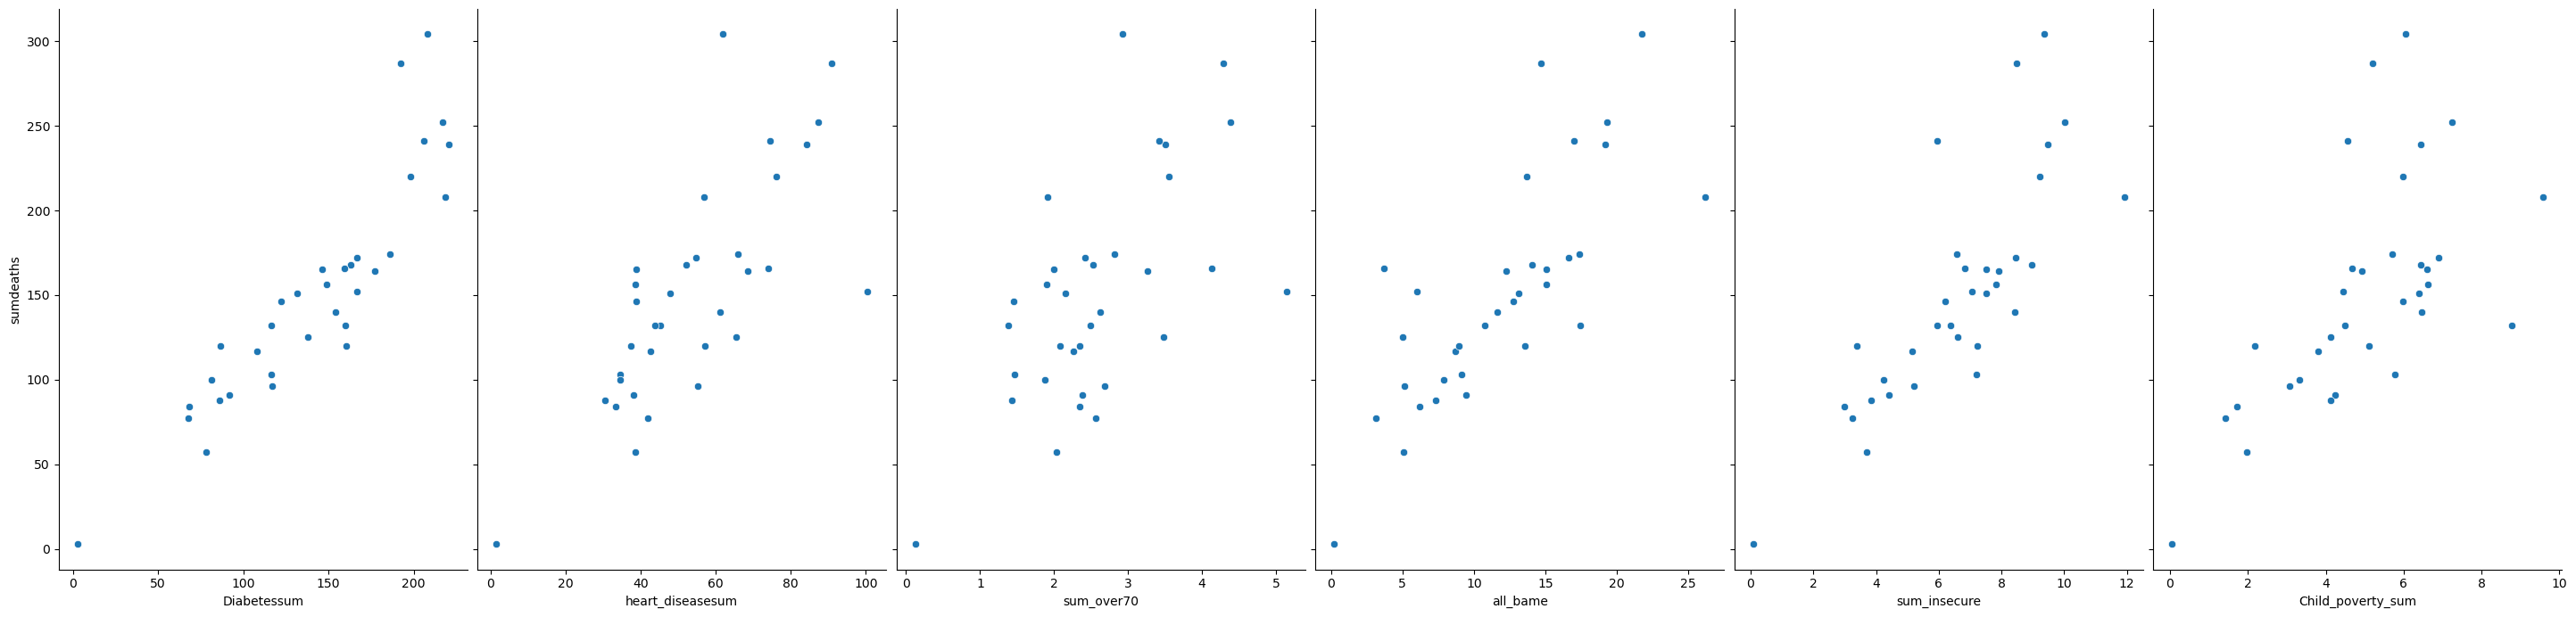

In [78]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(final, x_vars=['Diabetessum','heart_diseasesum','sum_over70','all_bame','sum_insecure','Child_poverty_sum'], y_vars='sumdeaths', size=7, aspect=0.7)


## FITTED MODEL FOR BAME ONLY: regression 4
Is there a relationship between BAME and Covid deaths?
How strong is that relationship?


In [79]:
### STATSMODELS ### Let's estimate the model coefficients for the data
import statsmodels.formula.api as smf

# create a fitted model
lm1 = smf.ols(formula='sumdeaths ~ all_bame', data=data).fit()

# print the coefficients
lm1.params

Intercept    48.618431
all_bame      8.633830
dtype: float64

In [80]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['all_bame']
X = data[feature_cols]
y = data.sumdeaths

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

48.61843135802505
[8.63382976]


## Is there a relationship between BAME and Covid deaths?
How strong is that relationship?


A "unit" increase in allbame is associated with a 8.63 "unit" increase in covid deaths

Note here that the coefficients represent associations

## predictions: Given a certain proportion OF BAME  , can covid deaths be predicted?
if there were an increase of bame by a proportion of 0.5. What would we predict for covid deaths?

In [82]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'all_bame': [0.5]})

# predict for a new observation
lm1.predict(X_new)

0    52.935346
dtype: float64

 predict covid deaths of 52.

In [85]:
#confidence interval
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,14.857559,82.379304
all_bame,6.057800,11.209859


In [86]:
#p values
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    6.199126e-03
all_bame     1.167444e-07
dtype: float64

## hypothesis
in this case, the p-value for bame is far less than 0.05

Reject null hypothesis
There is a relationship between bame and covid deaths

In [87]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.60116300106603

Adjusted R-Square - Reflects the fit and predictive power of the model with the value being 0 to 1. A high Adjusted R square value is desired. Here the Adj R-sq. value is 0.86 indicating a good fit. but the r squared is 0.60

## conclusion for regression 3 using standardised data
Interpretation:

Regression equation is
Covid deaths = (constant)-2.776e17+0.5484*allbame+0.5522*sum_over70+-0.4144*heart_diseasesum+0.5948*Diabetessum+0.1058*sum_insecure+0.3016*Child_poverty_sum

Adjusted R-Square - Reflects the fit and predictive power of the model with the value being 0 to 1.
Here the Adj R-sq. value is 0.86 indicating good fit.
R-Squared is 0.88 which is higher than model 4 which is .60